## Final Project Submission

Please fill out:
* Student name: Yusra Noor Mohamed
* Student pace: full time
* Scheduled project review date/time: 15/09/2023
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd# to deal with the dataframes
import numpy as np
from zipfile import ZipFile
import glob
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sqlite3
import seaborn as sns# for visualizations
import datetime

In [3]:
path = "/Users/yusranoor/Documents/project_phase1/dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv"
path1="/Users/yusranoor/Documents/project_phase1/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv"

# 1.READING THE DATASET 

The data that is going to be used are tmdb.movies.csv and tn.movies_budgets.csv

In [4]:
df=pd.read_csv(path)
df1=pd.read_csv(path1)

In [5]:
df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


# 2.  DATA UNDERSTANDING 

I need to focus on understanding the data by examining the data patterns and trends by checking the description , info(),shape etc


I will be checking for 

a)Missing data/null values

b)Duplicates

c)If Data types  are correct

d)Incorrect data


In [6]:
df.describe() # basic statistics  of the columns

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


On the output above, There is a column "unnamed" that is not needed 
The columns are all a float 

In [7]:
df.isna().sum()#check for the null values

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [8]:
df.duplicated().sum()#

0

when checking the null values I have found that the dataset has no null values and no duplicates

In [9]:
df.info #shows the count and data types of the columns

<bound method DataFrame.info of        Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-

The unnamed column should be dropped to save memory and it is not needed

In [10]:
df.nunique()

Unnamed: 0           26517
genre_ids             2477
id                   25497
original_language       76
original_title       24835
popularity            7425
release_date          3433
title                24688
vote_average            91
vote_count            1693
dtype: int64

In [11]:
df.columns 

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [12]:
df.dtypes# examine the data types

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

# DATA PREPARATION

check if the date is datetime object

In [13]:
df['release_date']=pd.to_datetime(df['release_date'])

In [14]:
isinstance(df['release_date'][0],datetime.date)

True

Create a new column for year 

In [15]:
df['year'] = pd.DatetimeIndex(df['release_date']).year
df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018


Drop the unamed column because it is not needed

In [16]:
 df = df.drop(columns="Unnamed: 0")

In [17]:
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018


Identifying outliers using IQR ,The IQR is calculated by getting the difference
between the 75th percetile and the 25th percentile


To check the ouliers

/Users/yusranoor/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_average'>

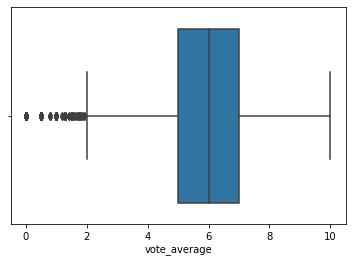

In [18]:
sns.boxplot(df['vote_average'])

In [19]:
#calculate IQR for vote_average
Q1 = df['vote_average'].quantile(.25)
Q3 = df['vote_average'].quantile(.75)
IQR = Q3 - Q1 
IQR

2.0

threshold is 2.0

In [20]:
threshold=2.0
outliers=df[(df['vote_average']<(Q1-threshold *IQR))|(df['vote_average']>(Q3 +threshold *IQR))]


lets replace the outliers with median

In [21]:
df['vote_average'] = df['vote_average'].replace(np.nan, df['vote_average'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
 9   year               26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB


In [22]:
df['popularity'].value_counts()

0.600     7037
1.400      649
0.840      587
0.624      104
0.625       92
          ... 
3.742        1
14.749       1
7.924        1
8.414        1
9.060        1
Name: popularity, Length: 7425, dtype: int64

In [23]:
df['release_date'].value_counts()

2010-01-01    269
2011-01-01    200
2014-01-01    155
2012-01-01    155
2013-01-01    145
             ... 
2013-02-17      1
2012-06-10      1
2018-04-02      1
2011-05-26      1
2015-04-06      1
Name: release_date, Length: 3433, dtype: int64

# DATA ANALYSIS

1.Number of movies released each year

In [24]:
import datetime

Lets extract the year from the date to get the number of movies released in the last 10 years

In [25]:

# Using pandas.DatetimeIndex() to extract year
df['year'] = pd.DatetimeIndex(df['release_date']).year
print(df['year'])


0        2010
1        2010
2        2010
3        1995
4        2010
         ... 
26512    2018
26513    2018
26514    2018
26515    2018
26516    2018
Name: year, Length: 26517, dtype: int64


In [26]:
years=df.year.unique()
years.sort()
print(years)

[1930 1933 1936 1939 1946 1949 1956 1957 1958 1959 1960 1961 1962 1964
 1965 1966 1967 1968 1970 1972 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


In [27]:
df_num_of_movies = df.groupby(['year'])['original_title'].count().tail(10)
df_num_of_movies.sort_values()

year
2020       1
2019      63
2018    2587
2012    2659
2011    2696
2014    3137
2017    3145
2013    3147
2016    3192
2015    3258
Name: original_title, dtype: int64

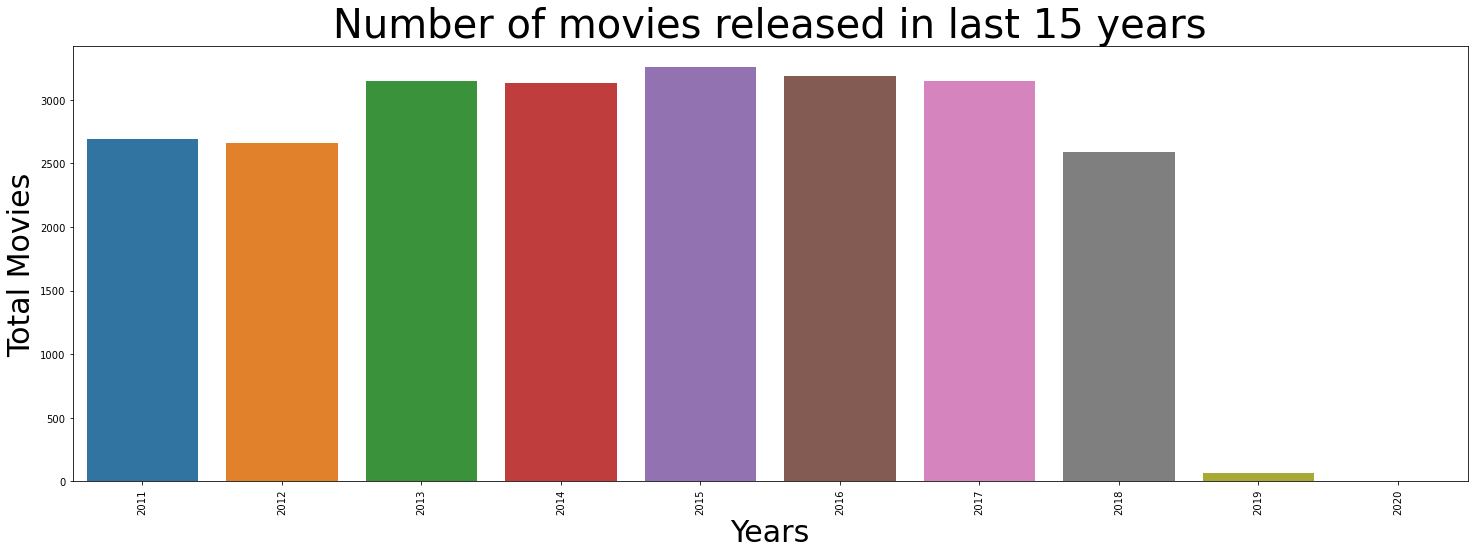

In [28]:
df_num_of_movies = df.groupby(['year'])['original_title'].count().tail(10)
plt.figure(figsize=(25,8))
ax= sns.barplot(x=df_num_of_movies.index,y=df_num_of_movies.values, data=df)
 
plt.xlabel('Years',fontsize=30)
plt.xticks(rotation=90)
plt.ylabel('Total Movies',fontsize=30)
plt.title("Number of movies released in last 15 years", fontsize=40)
plt.show()

We can see that in 2015 the most movies were released

2.What movies were released in 2015

In [29]:
movies_2015=df[df['year']==2015]['original_title'].value_counts().nlargest(10)

In [30]:
movies_2015

Eden                              4
The Ultimate Legacy               3
Here Come the Videofreex          3
Bullets, Fangs and Dinner at 8    3
Noble                             3
The Road Within                   3
Joker's Poltergeist               3
Mission to Lars                   3
Man Up                            3
Extraction                        3
Name: original_title, dtype: int64

3.Getting the best time of the year to release a movie

In [31]:
#add a new column called month
dateData=[x.strftime('%B')for x in df['release_date']]
df['Month']=dateData
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,Month
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,November
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,March
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,May
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,November
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,July
...,...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,October
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,May
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018,October
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018,June


count the total number of movies and group by month

In [32]:
group_by_month=df.groupby(['Month'],as_index=False)['original_title'].count().sort_values(by='original_title',ascending=False)
group_by_month

,Month,original_title
4,January,3132
10,October,3035
0,April,2566
7,March,2406
9,November,2338
11,September,2264
6,June,2166
2,December,1929
8,May,1865
1,August,1698


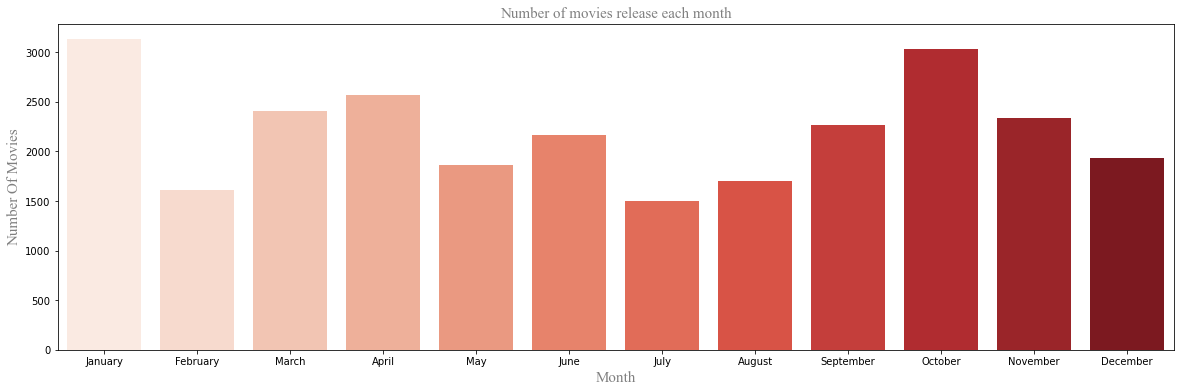

In [33]:
#lets visualize 
plt.figure(figsize=(20,6))
ax=sns.countplot(x=df['Month'],palette='Reds',order=['January','February','March'
                                                     ,'April','May','June','July','August','September'
                                                     ,'October','November','December'])
plt.xlabel('Month',fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.ylabel('Number Of Movies',fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.title('Number of movies release each month',fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.show()

We can see that the best month to release a movie is january

3.Distribution of the vote average

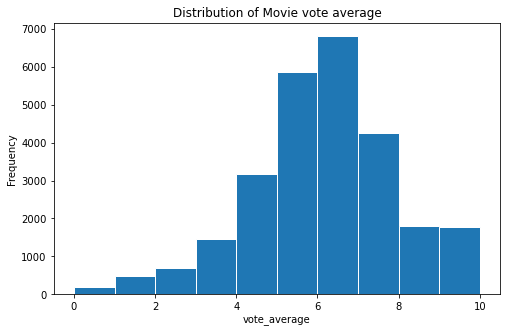

In [34]:
plt.figure(figsize=(8, 5))
plt.hist(df['vote_average'], bins=10, edgecolor='white')
plt.xlabel('vote_average')
plt.ylabel('Frequency')
plt.title('Distribution of Movie vote average')
plt.show()

Most of the rating fall between 6 and 8

The Top rated movies

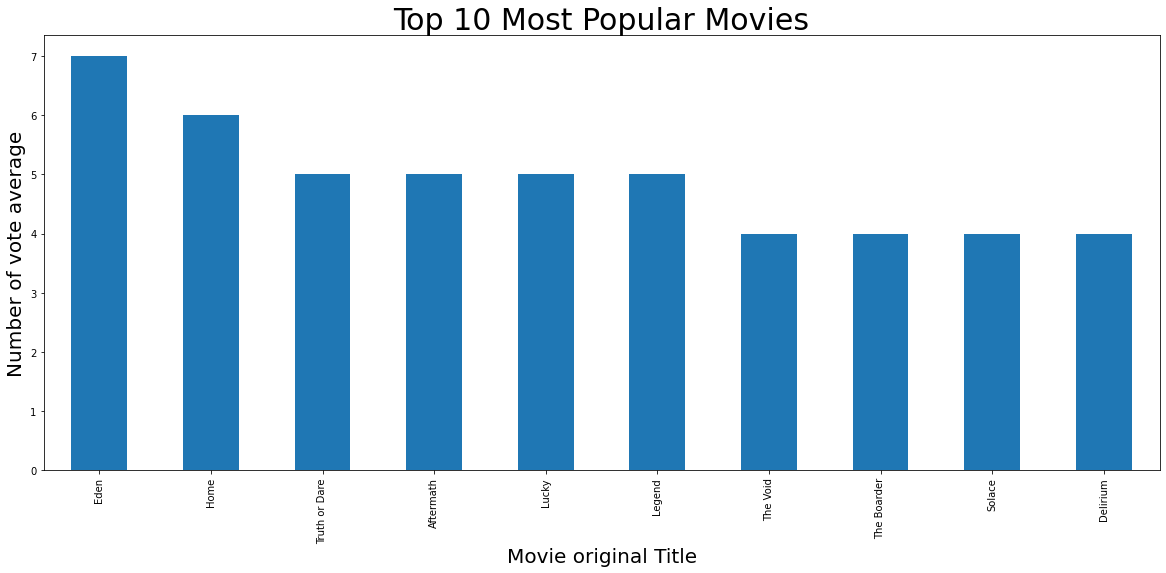

In [35]:
top_10_movies = df['original_title'].value_counts().nlargest(10)
plt.figure(figsize=(20, 8))
top_10_movies.plot(kind='bar')
plt.xlabel('Movie original Title',fontsize=20)
plt.ylabel('Number of vote average',fontsize=20)
plt.title('Top 10 Most Popular Movies',fontsize=30)
plt.show()

# READING DATASET DF1

In [36]:
df1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [38]:
df1.duplicated().any()

False

No duplicates values 

In [39]:
df1.isnull().any()

id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
dtype: bool

No missing values 

 check if the release date is datetime object


In [40]:
df1['release_date']=pd.to_datetime(df1['release_date'])

In [41]:
isinstance(df1['release_date'][0],datetime.date)

True

check if the production_budget,domestic_gross,worldwide_gross are integer values 

In [42]:
print(type(df1['production_budget'][0]))
print(type(df1['domestic_gross'][0]))
print(type(df1['worldwide_gross'][0]))

<class 'str'>
<class 'str'>
<class 'str'>


They are all strings we need to convert them into integers, by removing the dollar sign and the commas

In [43]:
#remove the commas
df1['production_budget']=df1['production_budget'].str.replace('$','').str.replace(',','').astype('int')
df1['domestic_gross']=df1['domestic_gross'].str.replace('$','').str.replace(',','').astype('int')
df1['worldwide_gross']=df1['worldwide_gross'].str.replace('$','').str.replace(',','').astype('int')

In [44]:
#create year column 
df1['year'] = pd.DatetimeIndex(df1['release_date']).year
df1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018
5778,79,1999-04-02,Following,6000,48482,240495,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015


Rename the movie column to title to match the dataset ontop for merging

In [45]:
df1=df1.rename(columns={'movie':'title'})

In [46]:
df1

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018
5778,79,1999-04-02,Following,6000,48482,240495,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015


Merging the dataset

In [47]:
df2 = pd.merge(df, df1, on=['title', 'release_date'])

In [48]:
df2

,genre_ids,id_x,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year_x,Month,id_y,production_budget,domestic_gross,worldwide_gross,year_y
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,March,30,165000000,217581232,494870992,2010
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,May,15,170000000,312433331,621156389,2010
2,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,November,37,30000000,191796233,364545516,1995
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,November,37,30000000,191796233,364545516,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,July,38,160000000,292576195,835524642,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,"[53, 18, 27]",510284,en,Braid,5.972,2019-02-01,Braid,6.4,18,2019,February,48,1660000,0,80745,2019
1396,"[18, 10752]",514407,en,Indivisible,5.599,2018-10-26,Indivisible,5.4,13,2018,October,93,2700000,3511417,3588305,2018
1397,"[18, 28, 80]",547590,en,El Chicano,5.274,2019-05-03,El Chicano,9.0,1,2019,May,16,8000000,700261,700261,2019
1398,"[18, 35, 28, 80]",506971,ur,Teefa in Trouble,4.486,2018-07-20,Teefa in Trouble,7.6,11,2018,July,8,1500000,0,98806,2018


dropping the unneccessary ids in the dataset id_x and id_y

In [49]:
df2.drop(columns=['id_x','id_y'],inplace=True)

In [50]:
df2.isnull().sum()#There no missig values 

genre_ids            0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
year_x               0
Month                0
production_budget    0
domestic_gross       0
worldwide_gross      0
year_y               0
dtype: int64

In [51]:
df2.duplicated()#There are no duplicates either

0       False
1       False
2       False
3        True
4       False
        ...  
1395    False
1396    False
1397    False
1398    False
1399    False
Length: 1400, dtype: bool

In [52]:
df2

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year_x,Month,production_budget,domestic_gross,worldwide_gross,year_y
0,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,March,165000000,217581232,494870992,2010
1,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,May,170000000,312433331,621156389,2010
2,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,November,30000000,191796233,364545516,1995
3,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,November,30000000,191796233,364545516,1995
4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,July,160000000,292576195,835524642,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,"[53, 18, 27]",en,Braid,5.972,2019-02-01,Braid,6.4,18,2019,February,1660000,0,80745,2019
1396,"[18, 10752]",en,Indivisible,5.599,2018-10-26,Indivisible,5.4,13,2018,October,2700000,3511417,3588305,2018
1397,"[18, 28, 80]",en,El Chicano,5.274,2019-05-03,El Chicano,9.0,1,2019,May,8000000,700261,700261,2019
1398,"[18, 35, 28, 80]",ur,Teefa in Trouble,4.486,2018-07-20,Teefa in Trouble,7.6,11,2018,July,1500000,0,98806,2018


creating a profit table by using the formula below
percentage_profit=(worldwide_gross-production_budget)/production *100

In [53]:
df2['Profit']=df2['worldwide_gross']-df2['production_budget']
df2['Profit_margin']=df2['Profit']/df2['worldwide_gross']

In [54]:
df2

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year_x,Month,production_budget,domestic_gross,worldwide_gross,year_y,Profit,Profit_margin
0,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,March,165000000,217581232,494870992,2010,329870992,0.666580
1,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,May,170000000,312433331,621156389,2010,451156389,0.726317
2,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,November,30000000,191796233,364545516,1995,334545516,0.917706
3,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,November,30000000,191796233,364545516,1995,334545516,0.917706
4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,July,160000000,292576195,835524642,2010,675524642,0.808504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,"[53, 18, 27]",en,Braid,5.972,2019-02-01,Braid,6.4,18,2019,February,1660000,0,80745,2019,-1579255,-19.558549
1396,"[18, 10752]",en,Indivisible,5.599,2018-10-26,Indivisible,5.4,13,2018,October,2700000,3511417,3588305,2018,888305,0.247556
1397,"[18, 28, 80]",en,El Chicano,5.274,2019-05-03,El Chicano,9.0,1,2019,May,8000000,700261,700261,2019,-7299739,-10.424312
1398,"[18, 35, 28, 80]",ur,Teefa in Trouble,4.486,2018-07-20,Teefa in Trouble,7.6,11,2018,July,1500000,0,98806,2018,-1401194,-14.181264


<AxesSubplot:>

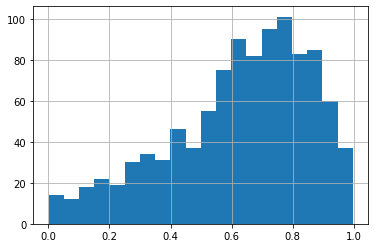

In [55]:
df2[df2['Profit_margin'] >= 0]['Profit_margin'].hist(bins=20) 

lets get movies with profits

In [56]:
movie_profit=df2.loc[df2['Profit']>0]

Visuliazing movies that have low budget , I will use the IQR to get the percentiles using the production budget column

<AxesSubplot:>

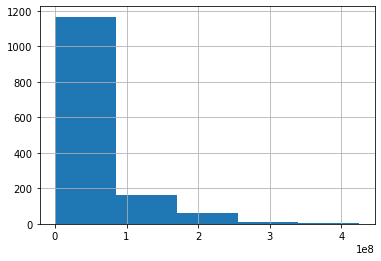

In [57]:
df2['production_budget'].hist(bins=5)

Getting the interquartile range

In [58]:
Q1,Q2,Q3,Q4=np.percentile(df2['production_budget'],[25,50,75,100])
iqrs=Q3-Q1
print(iqrs)
print(Q1)
print(Q2)
print(Q3)
print(Q4)



51000000.0
9000000.0
25000000.0
60000000.0
425000000.0


In [59]:
df3=df2[df2['production_budget']>9000000]

In [60]:
df3

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year_x,Month,production_budget,domestic_gross,worldwide_gross,year_y,Profit,Profit_margin
0,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,March,165000000,217581232,494870992,2010,329870992,0.666580
1,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,May,170000000,312433331,621156389,2010,451156389,0.726317
2,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,November,30000000,191796233,364545516,1995,334545516,0.917706
3,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,November,30000000,191796233,364545516,1995,334545516,0.917706
4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,July,160000000,292576195,835524642,2010,675524642,0.808504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,"[80, 18, 36, 53]",en,Gotti,10.034,2018-06-15,Gotti,5.2,231,2018,June,10000000,4286367,6089100,2018,-3910900,-0.642279
1389,"[53, 28, 80]",en,Proud Mary,9.371,2018-01-12,Proud Mary,5.5,259,2018,January,30000000,20868638,21709539,2018,-8290461,-0.381881
1392,"[18, 10752, 28, 12]",en,Air Strike,6.971,2018-10-26,Air Strike,3.9,56,2018,October,65000000,0,516279,2018,-64483721,-124.900918
1394,"[16, 12, 10751, 36, 10752]",en,Sgt. Stubby: An American Hero,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,2018,April,25000000,3054285,3645957,2018,-21354043,-5.856910


In [61]:
for k,v in df3.iterrows():
    if df2.loc[k, 'production_budget'] < 9000000:
        df2.loc[k, 'budget_category'] = 'medium'
    elif ((df2.loc[k, 'production_budget'] >= 9000000) & 
          (df3.loc[k, 'production_budget'] < 60000000)):
        df2.loc[k, 'budget_category'] = 'high'
    else:
        df2.loc[k, 'budget_category'] = 'very high'

In [62]:
df3

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year_x,Month,production_budget,domestic_gross,worldwide_gross,year_y,Profit,Profit_margin
0,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,March,165000000,217581232,494870992,2010,329870992,0.666580
1,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,May,170000000,312433331,621156389,2010,451156389,0.726317
2,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,November,30000000,191796233,364545516,1995,334545516,0.917706
3,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,November,30000000,191796233,364545516,1995,334545516,0.917706
4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,July,160000000,292576195,835524642,2010,675524642,0.808504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,"[80, 18, 36, 53]",en,Gotti,10.034,2018-06-15,Gotti,5.2,231,2018,June,10000000,4286367,6089100,2018,-3910900,-0.642279
1389,"[53, 28, 80]",en,Proud Mary,9.371,2018-01-12,Proud Mary,5.5,259,2018,January,30000000,20868638,21709539,2018,-8290461,-0.381881
1392,"[18, 10752, 28, 12]",en,Air Strike,6.971,2018-10-26,Air Strike,3.9,56,2018,October,65000000,0,516279,2018,-64483721,-124.900918
1394,"[16, 12, 10751, 36, 10752]",en,Sgt. Stubby: An American Hero,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,2018,April,25000000,3054285,3645957,2018,-21354043,-5.856910


In [63]:
df2[df2['budget_category']=='high']

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year_x,Month,production_budget,domestic_gross,worldwide_gross,year_y,Profit,Profit_margin,budget_category
2,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,November,30000000,191796233,364545516,1995,334545516,0.917706,high
3,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,November,30000000,191796233,364545516,1995,334545516,0.917706,high
13,"[18, 10749]",en,Step Up 3D,17.174,2010-08-06,Step Up 3D,6.7,1160,2010,August,30000000,42400223,165889117,2010,135889117,0.819156,high
15,"[28, 35, 80, 53]",en,Bad Boys,16.608,1995-04-07,Bad Boys,6.6,2936,1995,April,23000000,65647413,141247413,1995,118247413,0.837165,high
17,[18],en,The Social Network,15.889,2010-10-01,The Social Network,7.2,6116,2010,October,40000000,96962694,224922135,2010,184922135,0.822161,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,"[18, 53]",en,Acrimony,10.600,2018-03-30,Acrimony,6.6,186,2018,March,20000000,43549096,46627836,2018,26627836,0.571072,high
1387,"[80, 18, 36, 53]",en,Gotti,10.034,2018-06-15,Gotti,5.2,231,2018,June,10000000,4286367,6089100,2018,-3910900,-0.642279,high
1389,"[53, 28, 80]",en,Proud Mary,9.371,2018-01-12,Proud Mary,5.5,259,2018,January,30000000,20868638,21709539,2018,-8290461,-0.381881,high
1394,"[16, 12, 10751, 36, 10752]",en,Sgt. Stubby: An American Hero,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,2018,April,25000000,3054285,3645957,2018,-21354043,-5.856910,high


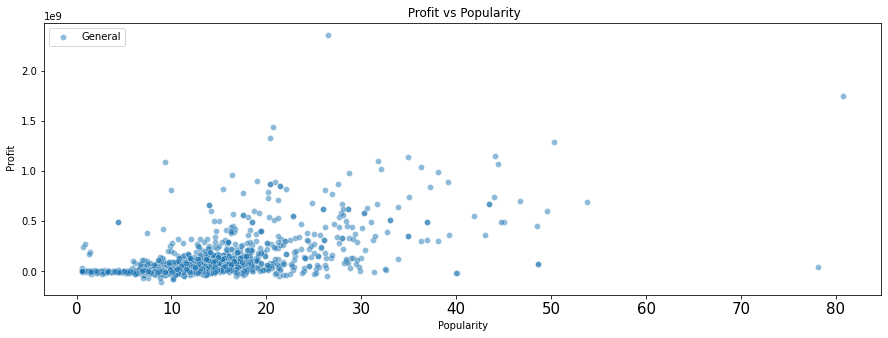

In [64]:
#plot 'popularity' vs. 'worldwide_profit'
plt.figure(figsize = (15, 5))

#popularity
sns.scatterplot(x = df2['popularity'],
                      y = df2['Profit'],
                      label = 'General', alpha = 0.5)



#set labels
plt.title(' Profit vs Popularity')
plt.xlabel('Popularity')
plt.ylabel(' Profit')
plt.legend(loc='upper left')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

with increase in popularity there is a corresponding increase in profit

In [65]:
df2[['original_title', 'Profit', 'popularity']].sort_values(by = 'popularity', ascending = False)[:5]

,original_title,Profit,popularity
1285,Avengers: Infinity War,1748134200,80.773
576,John Wick,46235001,78.123
577,The Hobbit: The Battle of the Five Armies,695577621,53.783
297,The Avengers,1292935897,50.289
578,Guardians of the Galaxy,600867516,49.606


ValueError: x and y must have same first dimension, but have shapes (1400,) and (1,)

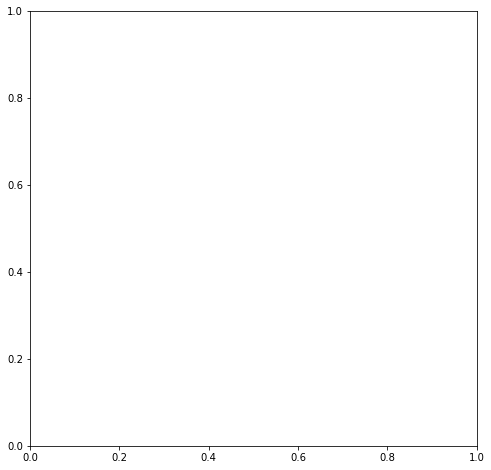

In [66]:
#creat figure
figure_budget, ax = plt.subplots(figsize = (8,8))

#groupby year to identify trend over time and get mean percentage gross in each year
y_values = df2['production_budget']
x = df2['year_x']

#plot on same axis with different colors
ax.plot(x,y_values[4], label = 'less than $500,000', color='magenta')
ax.plot(x,y_values[3], label = '$500,000 - $5,000,000', color = 'springgreen')
ax.plot(x,y_values[2], label = '$5,000,000 - $20,000,000', color = 'cyan')
ax.plot(x,y_values[1], label = '$20,000,000 - $85,000,000', color = 'orangered')
ax.plot(x,y_values[0], label = 'greater than $85,000,000', color = 'slateblue')
ax.set_title('Percent Gross Income vs Movie Budget')
ax.set_xlabel('Year')
ax.set_ylabel('Avg Percent Gross')

plt.legend();